In [1]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statannot import add_stat_annotation
import trackpy as tp
import random

# Load data

In [2]:
data_trajectories_matrigel = pandas.read_csv(r"Data\Trajectories_in_matrigel.csv")
data_accumulation = pandas.read_csv(r'Data\Fig_3_Accumulation.csv')

In [3]:
trajectories_wt = data_trajectories_matrigel.loc[data_trajectories_matrigel.type == 'wt'].reset_index(drop = True)
trajectories_apc = data_trajectories_matrigel.loc[data_trajectories_matrigel.type == 'apc'].reset_index(drop = True)

# Plot some trajectories

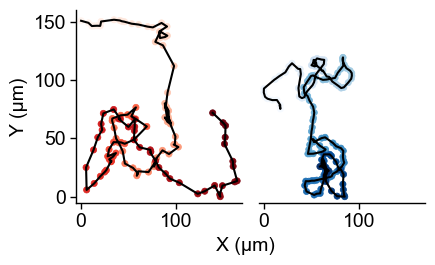

In [4]:
# Define font
plt.rc('font',family='Arial')

# Plot
fig, ax = plt.subplots(1,2, figsize = (4.5,2.5))

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.1, hspace=0.1)

for i in [0,1]:
    ax[i].set_xlim(-5,170)
    ax[i].set_ylim(-5,160)
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['bottom'].set_visible(True)
    ax[i].spines['left'].set_visible(True)
    ax[i].tick_params(axis='x', labelsize=14, rotation=0)
    ax[i].tick_params(axis='y', labelsize=14)        
    ax[i].tick_params(width=1, length=4)
    for axis in ['bottom','left']:
        ax[i].spines[axis].set_linewidth(1)
ax[0].spines['left'].set_visible(True)
ax[1].spines['left'].set_visible(False)

particle_nb = 13180
time = np.array(trajectories_wt.loc[trajectories_wt.particle == particle_nb, 'frame']*3)
time = time - np.min(time)
X = np.array(trajectories_wt.loc[trajectories_wt.particle == particle_nb, 'x'])
X = X - np.min(X)
# print(max(time))
Y = np.array(trajectories_wt.loc[trajectories_wt.particle == particle_nb, 'y'])
Y = Y - np.min(Y)
ax[1].scatter(X,Y, c = time, cmap = 'Blues', linewidths = 0.5, s = 20)
ax[1].plot(X,Y, c ='k')
ax[0].set_ylabel('Y (µm)', fontsize=14)
ax[1].set_xlabel(' ', fontsize=14)

particle_nb = 1387
time = np.array(trajectories_apc.loc[trajectories_apc.particle == particle_nb, 'frame']*3)
time = time - np.min(time)
X = np.array(trajectories_apc.loc[trajectories_apc.particle == particle_nb, 'x'])
X = X - np.min(X)
# print(max(time))
Y = np.array(trajectories_apc.loc[trajectories_apc.particle == particle_nb, 'y'])
Y = Y - np.min(Y)
ax[0].plot(X,Y, c ='k')
ax[0].scatter(X,Y, c = time, cmap = 'Reds', linewidths = 0.5, s = 20)
ax[1].set_ylabel(' ', fontsize=14)
ax[0].set_xlabel(' ', fontsize=14)

labels = []
ax[1].set_yticklabels(labels, fontsize = 12)
ax[1].set_yticks([])

fig.supxlabel('X (µm)', fontsize = 14, ha = 'center', y = -0.1)
plt.show()

# MSD in matrigel

In [ ]:
# Compute MSD
limit = 28

emwt_off = pandas.DataFrame()
for well in trajectories_wt.well.unique():
    if len(trajectories_wt.loc[(trajectories_wt.well == well)]) > 0:
        df = trajectories_wt.loc[(trajectories_wt.well == well)].sort_values(by = ['particle','frame']).reset_index(drop = True)
        emwt_off_well = tp.emsd(df, 1, 1/3)
        emwt_off_well = pandas.DataFrame(emwt_off_well).reset_index()
        emwt_off_well = emwt_off_well.loc[emwt_off_well.lagt < limit]
        emwt_off_well = emwt_off_well.set_index('lagt')
        emwt_off_well = emwt_off_well[['msd']]
        emwt_off_well['well'] = well
        emwt_off_well = emwt_off_well.reset_index()
        emwt_off = pandas.concat([emwt_off, emwt_off_well], axis = 0).reset_index(drop = True)
emwt_off = emwt_off.reset_index()
emwt_off.lagt = np.array(round(emwt_off.lagt,0)).astype(int)

emapc_off = pandas.DataFrame()
for well in trajectories_apc.well.unique():
    if len(trajectories_apc.loc[(trajectories_apc.well == well)]) > 0:
        df = trajectories_apc.loc[(trajectories_apc.well == well)].sort_values(by = ['particle','frame']).reset_index(drop = True)
        emapc_off_well = tp.emsd(df, 1, 1/3)
        emapc_off_well = pandas.DataFrame(emapc_off_well).reset_index()
        emapc_off_well = emapc_off_well.loc[emapc_off_well.lagt < limit]
        emapc_off_well = emapc_off_well.set_index('lagt')
        emapc_off_well = emapc_off_well[['msd']]
        emapc_off_well['well'] = well
        emapc_off_well = emapc_off_well.reset_index()
        emapc_off = pandas.concat([emapc_off, emapc_off_well], axis = 0).reset_index(drop = True)
emapc_off = emapc_off.reset_index()
emapc_off.lagt = np.array(round(emapc_off.lagt,0)).astype(int)

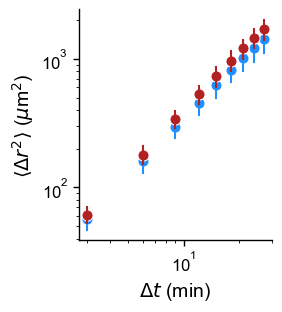

In [7]:
# Define font
plt.rc('font',family='Arial')

# Plot
fig, ax = plt.subplots(1, figsize = (2.5,3))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)       
ax.tick_params(width=1, length=4)
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(1)

order = ['APC', 'WT']
sns.lineplot(data = emwt_off, x = 'lagt', y = 'msd', marker = 'o', errorbar = 'ci', color = 'dodgerblue', err_style="bars", linestyle='', markersize = 8, label = r'$CTRL$')
sns.lineplot(data = emapc_off, x = 'lagt', y = 'msd', marker = 'o', errorbar = 'ci', color = 'firebrick', err_style="bars", linestyle='', markersize = 8, label = r'$APC^{Min\ /+}$')

ax.set_xlabel(r'$\Delta t$ (min)', fontsize = 14)
ax.set_ylabel(r'$\langle \Delta  r^2 \rangle$ ($\mu$m$^2$)', fontsize = 14)
ax.get_legend().remove()
ax.set_xscale('log')
ax.set_yscale('log')
plt.show()

# Boostrapping velocities

In [8]:
# Compute cell instantaneous velocities in matrigel
# WT cells
trajectories_wt['vel'] = np.nan
for part in trajectories_wt.particle.unique():
    df = trajectories_wt.loc[trajectories_wt.particle == part].sort_values(by=['frame']) 
    if len(df) > 3:
        dx = df.x.diff(1)
        dy = df.y.diff(1)
        dt = 3*df.frame.diff(1)
        v = np.sqrt(dx**2 + dy**2)/np.array(dt)
        for i in df.index:
            trajectories_wt.loc[i, 'vel'] = v[i]

# APC cells
trajectories_apc['vel'] = np.nan
for part in trajectories_apc.particle.unique():
    df = trajectories_apc.loc[trajectories_apc.particle == part].sort_values(by=['frame']) 
    if len(df) > 3:
        dx = df.x.diff(1)
        dy = df.y.diff(1)
        dt = 3*df.frame.diff(1)
        v = np.sqrt(dx**2 + dy**2)/np.array(dt)
        for i in df.index:
            trajectories_apc.loc[i, 'vel'] = v[i]
            
# ----------------------------------------------------------------------------------------------------------------

# Compute mean cell velocities in matrigel
# WT cells
mean_vel_wt_out_sph = []
well_wt_out_sph = []
part_wt_out_sph = []
date_wt_out_sph = []
for part in trajectories_wt.particle.unique():    
    loff = np.array(trajectories_wt.loc[(trajectories_wt.particle == part), 'vel'])
    lw = np.array(trajectories_wt.loc[(trajectories_wt.particle == part), 'well'].unique())[0]
    d = np.array(trajectories_wt.loc[(trajectories_wt.particle == part), 'date'].unique())[0]
    if len(loff) > 0:
        mean_vel = np.nanmean(loff)
        mean_vel_wt_out_sph.append(mean_vel)
        well_wt_out_sph.append(lw)
        part_wt_out_sph.append(part)
        date_wt_out_sph.append(d)
mean_vel_wt_out_sph = pandas.DataFrame(mean_vel_wt_out_sph)
mean_vel_wt_out_sph.columns = ['mean_vel']
mean_vel_wt_out_sph['well'] = well_wt_out_sph
mean_vel_wt_out_sph['part'] = part_wt_out_sph
mean_vel_wt_out_sph['date'] = date_wt_out_sph
     
# APC cells
mean_vel_apc_out_sph = []
well_apc_out_sph = []
part_apc_out_sph = []
date_apc_out_sph = []
for part in trajectories_apc.particle.unique():    
    loff = np.array(trajectories_apc.loc[(trajectories_apc.particle == part), 'vel'])
    lw = np.array(trajectories_apc.loc[(trajectories_apc.particle == part), 'well'].unique())[0]
    d = np.array(trajectories_apc.loc[(trajectories_apc.particle == part), 'date'].unique())[0]
    if len(loff) > 0:
        mean_vel = np.nanmean(loff)
        mean_vel_apc_out_sph.append(mean_vel)
        well_apc_out_sph.append(lw)
        part_apc_out_sph.append(part)
        date_apc_out_sph.append(d)
mean_vel_apc_out_sph = pandas.DataFrame(mean_vel_apc_out_sph)
mean_vel_apc_out_sph.columns = ['mean_vel']
mean_vel_apc_out_sph['well'] = well_apc_out_sph
mean_vel_apc_out_sph['part'] = part_apc_out_sph
mean_vel_apc_out_sph['date'] = date_apc_out_sph

mean_vel_wt_out_sph['type'] = 'wt'
mean_vel_apc_out_sph['type'] = 'apc'
mean_vel = pandas.concat([mean_vel_wt_out_sph, mean_vel_apc_out_sph])

# mean_vel.to_csv('Fig_3_mean_velocities.csv', index = False)

In [9]:
# Separate each biological replicate

apc_off_220922 = np.array(mean_vel.loc[(mean_vel.date == 220922) & (mean_vel.type == 'apc'), 'mean_vel'])
wt_off_220922 = np.array(mean_vel.loc[(mean_vel.date == 220922) & (mean_vel.type == 'wt'), 'mean_vel'])
apc_off_220901 = np.array(mean_vel.loc[(mean_vel.date == 220901) & (mean_vel.type == 'apc'), 'mean_vel'])
wt_off_220901 = np.array(mean_vel.loc[(mean_vel.date == 220901) & (mean_vel.type == 'wt'), 'mean_vel'])
apc_off_220719 = np.array(mean_vel.loc[(mean_vel.date == 220719) & (mean_vel.type == 'apc'), 'mean_vel'])
wt_off_220719 = np.array(mean_vel.loc[(mean_vel.date == 220719) & (mean_vel.type == 'wt'), 'mean_vel'])
mean_vel_wt = mean_vel.loc[mean_vel.type == 'wt']
mean_vel_apc = mean_vel.loc[mean_vel.type == 'apc']

# Bootstrap mean velocities
percent_of_tot = 0.5
N = 200

sample_mean_wt_off = []
nb_wt_off = 100
for q in [i for i in range(10000)]:
    list_wt_off = np.concatenate([random.sample(wt_off_220922.tolist(), nb_wt_off), random.sample(wt_off_220901.tolist(), nb_wt_off), random.sample(wt_off_220719.tolist(), nb_wt_off)])
    y = random.sample(list_wt_off.tolist(), N)
    avg = np.mean(y)
    sample_mean_wt_off.append(avg)

sample_mean_apc_off = []
nb_apc_off = 100
for q in [i for i in range(10000)]:
    list_apc_off = np.concatenate([random.sample(apc_off_220922.tolist(), nb_apc_off), random.sample(apc_off_220901.tolist(), nb_apc_off), random.sample(apc_off_220719.tolist(), nb_apc_off)])
    y = random.sample(list_apc_off.tolist(), N)
    avg = np.mean(y)
    sample_mean_apc_off.append(avg)

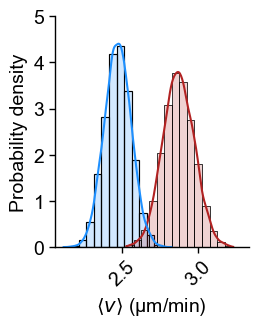

In [12]:
# Define font
plt.rc('font',family='Arial')

# Plot
fig, ax = plt.subplots(1, figsize = (2.5,3))

ax.set_ylim(0,5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.tick_params(axis='x', labelsize=14, rotation=45)
ax.tick_params(axis='y', labelsize=14)        
ax.tick_params(width=1, length=4)
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(1)

b = 0.05
sns.histplot(ax = ax, data = sample_mean_wt_off, stat = 'density', binwidth = b, color = 'dodgerblue', alpha = 0.2, cumulative=False, label = '$APC^{Min\ /+}$')
sns.histplot(ax = ax, data = sample_mean_apc_off, stat = 'density', binwidth = b, color = 'firebrick', alpha = 0.2, cumulative=False, label = '$CTRL$')

sns.kdeplot(ax = ax, data = sample_mean_apc_off, cut = 0, color = 'firebrick', alpha = 1, cumulative=False, label = '$APC^{Min\ /+}$')
sns.kdeplot(ax = ax, data = sample_mean_wt_off, cut = 0, color = 'dodgerblue', alpha = 1, cumulative=False, label = '$CTRL$')

ax.set_xlabel(r'$\langle v \rangle$ (µm/min)', fontsize = 14)
ax.set_ylabel('Probability density', fontsize = 14)
plt.show()

# CTLs accumulation

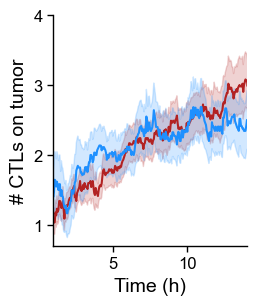

In [13]:
# Define font
plt.rc('font',family='Arial')

# Plot
fig, ax = plt.subplots(1, figsize = (2.5,3))

ax.set_ylim(0.7,4)
ax.set_xlim(1,14)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)       
ax.tick_params(width=1, length=4)
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(1)

order = ['APC', 'WT']
    
sns.lineplot(ax = ax,
             data=data_accumulation,
             hue_order = order,
             x = 'time_after_loading',
             y='nb_CTL',
             hue = 'type',
             errorbar = 'se',
             palette = ['firebrick', 'dodgerblue']
                  )
ax.set_xlabel('Time (h)', fontsize = 14)
ax.set_ylabel(r'# CTLs on tumor', fontsize = 14)
ax.legend(loc = 'upper left', fontsize = 12)
ax.get_legend().remove()
plt.show()